<div >
    <p style="style=width: 200px; height: auto; margin-left: 20px; font-size: 40px;
              text-align: left; text-align: center;">Banana Quality</p>
    <img src="img.jpeg" style="width: 200px; height: auto; margin-center: 20px; align: center">
</div>


# Data visualization

In [43]:
options(warn = -1, verbose = FALSE, message = FALSE,repr.plot.width = 15, repr.plot.height = 10)
suppressMessages(library(Rtsne))
suppressMessages(library(GGally))
suppressMessages(library(mclust))
suppressMessages(library(tidyverse))
suppressMessages(library(Rmixmod))
suppressMessages(library(GGally))
suppressMessages(library(knitr))

In [68]:
df <- read.csv("banana_quality.csv") 
df_t <- df %>%
  filter(complete.cases(.))
head(df_t)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-1.9249682,0.4680781,3.07783250,-1.472177,0.2947986,2.435570,0.2712903,Good
2,-2.4097514,0.4868699,0.34692144,-2.495099,-0.8922133,2.067549,0.3073251,Good
3,-0.3576066,1.4831762,1.56845220,-2.645145,-0.6472673,3.090643,1.4273220,Good
4,-0.8685235,1.5662014,1.88960490,-1.273761,-1.0062776,1.873001,0.4778617,Good
5,0.6518253,1.3191992,-0.02245899,-1.209709,-1.4306920,1.078345,2.8124418,Good
6,-2.8077223,1.1381357,3.44762680,-1.713302,-2.2209115,2.079410,2.2812028,Good


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


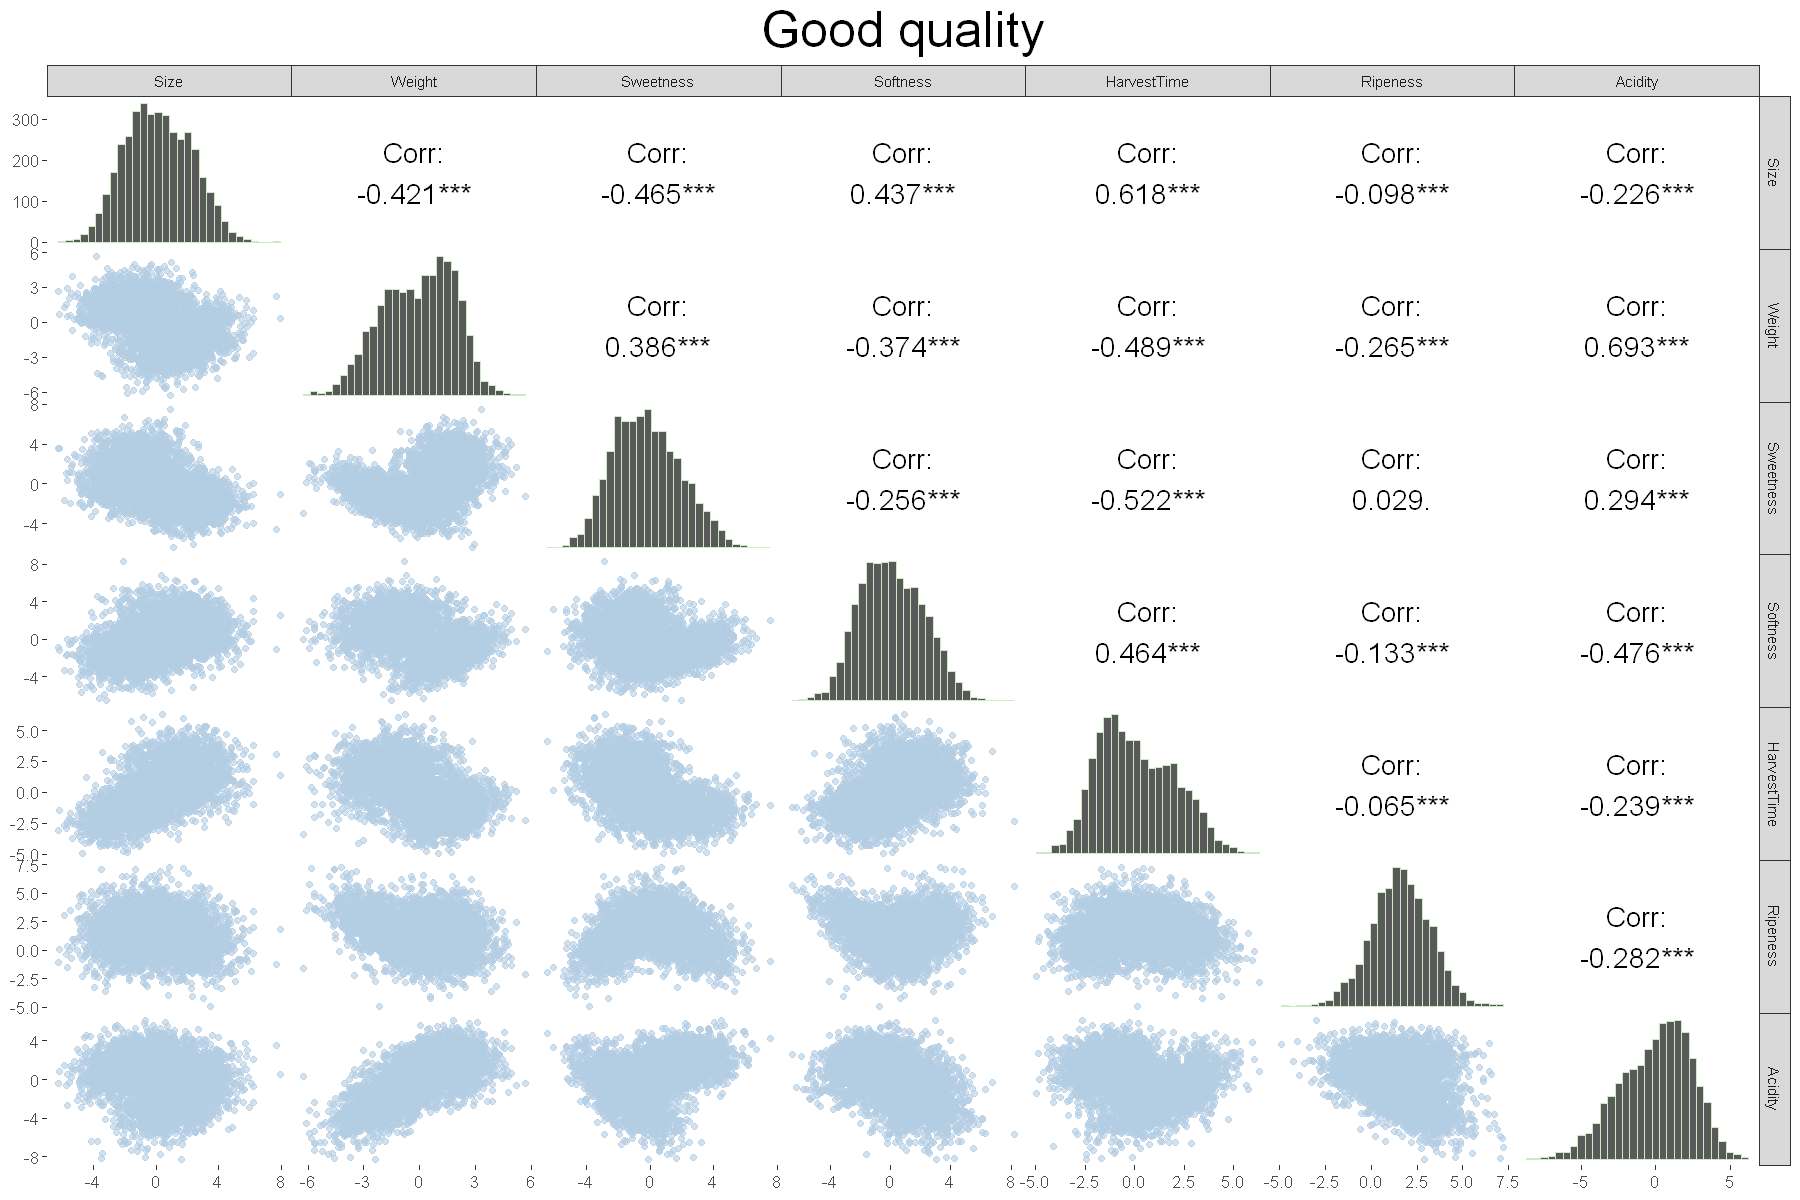

In [6]:

colores_pastel <- RColorBrewer::brewer.pal(9, "Pastel1")
ggpairs(df_t[df_t$Quality == "Good",], 
        columns = c(1:7),
        upper = list(continuous = wrap("cor", size = 6, color = "black")),
        lower = list(continuous = wrap("points", alpha = 0.6, color = colores_pastel[2])),
        diag = list(continuous = wrap("barDiag", color = colores_pastel[3])),
        background = "white",
       height = 80, 
        width = 80) + 
    theme_bw() + 
      theme(plot.title = element_text(color = "black",
                                  size = 30,hjust=0.5),
        axis.title.x = element_text(size = 20),  
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 10),
        axis.text.y = element_text(size = 10),
        panel.border = element_blank(),  
        panel.spacing = unit(0, "lines"),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 20),
        legend.position = "none",
        panel.grid.major = element_blank(),  
        panel.grid.minor = element_blank()) + 
        labs(title = "Good quality")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


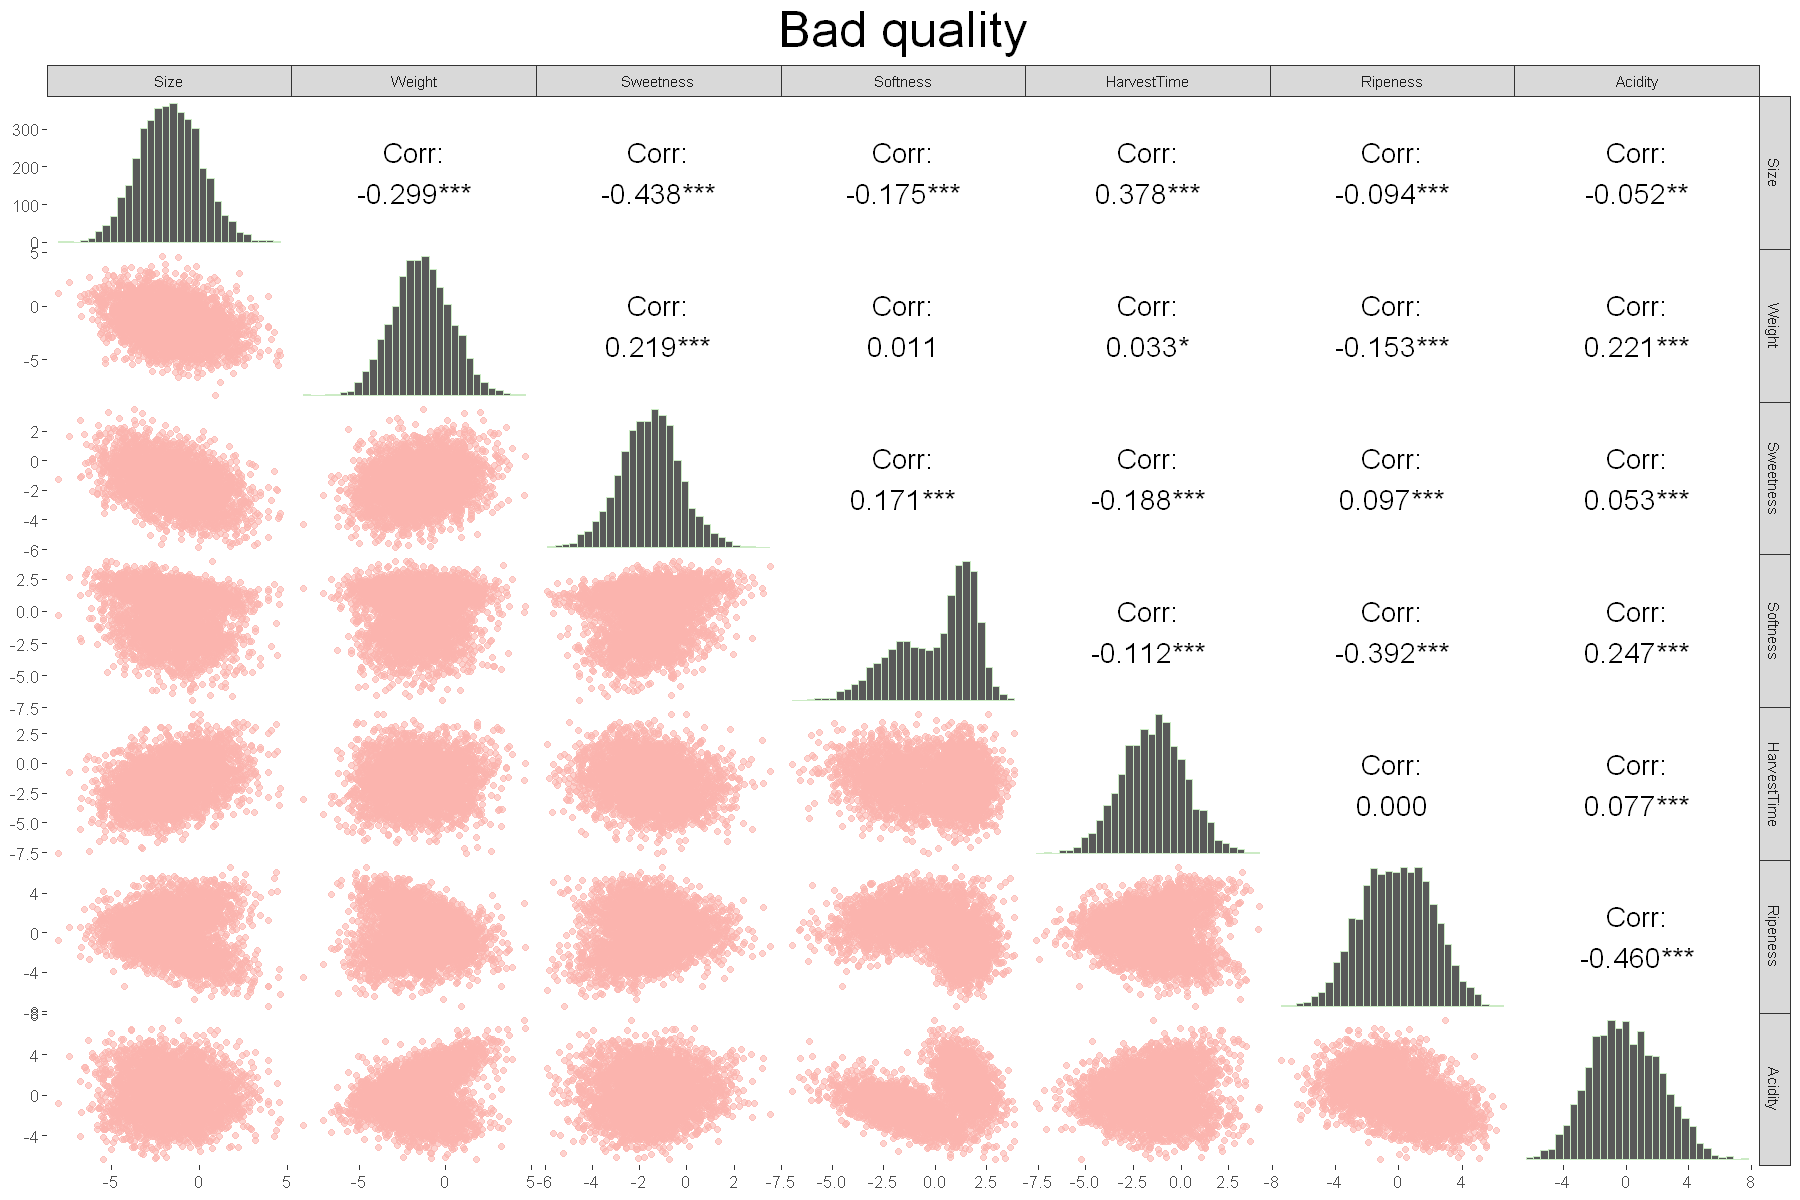

In [7]:
ggpairs(df_t[df_t$Quality == "Bad",], 
        columns = c(1:7),
        upper = list(continuous = wrap("cor", size = 6, color = "black")),
        lower = list(continuous = wrap("points", alpha = 0.6, color = colores_pastel[1])),
        diag = list(continuous = wrap("barDiag", color = colores_pastel[3])),
        background = "white",
       height = 80, 
        width = 80) + 
    theme_bw() + 
      theme(plot.title = element_text(color = "black",
                                  size = 30,hjust=0.5),
        axis.title.x = element_text(size = 20),  
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 10),
        axis.text.y = element_text(size = 10),
        panel.border = element_blank(),  
        panel.spacing = unit(0, "lines"),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 20),
        legend.position = "none",
        panel.grid.major = element_blank(),  
        panel.grid.minor = element_blank()) + 
        labs(title = "Bad quality")


## 2D visualization with TSNE

In [8]:
tsne_resultado <- Rtsne(df_t[,1:7], dims = 2,
                        seed = 10)

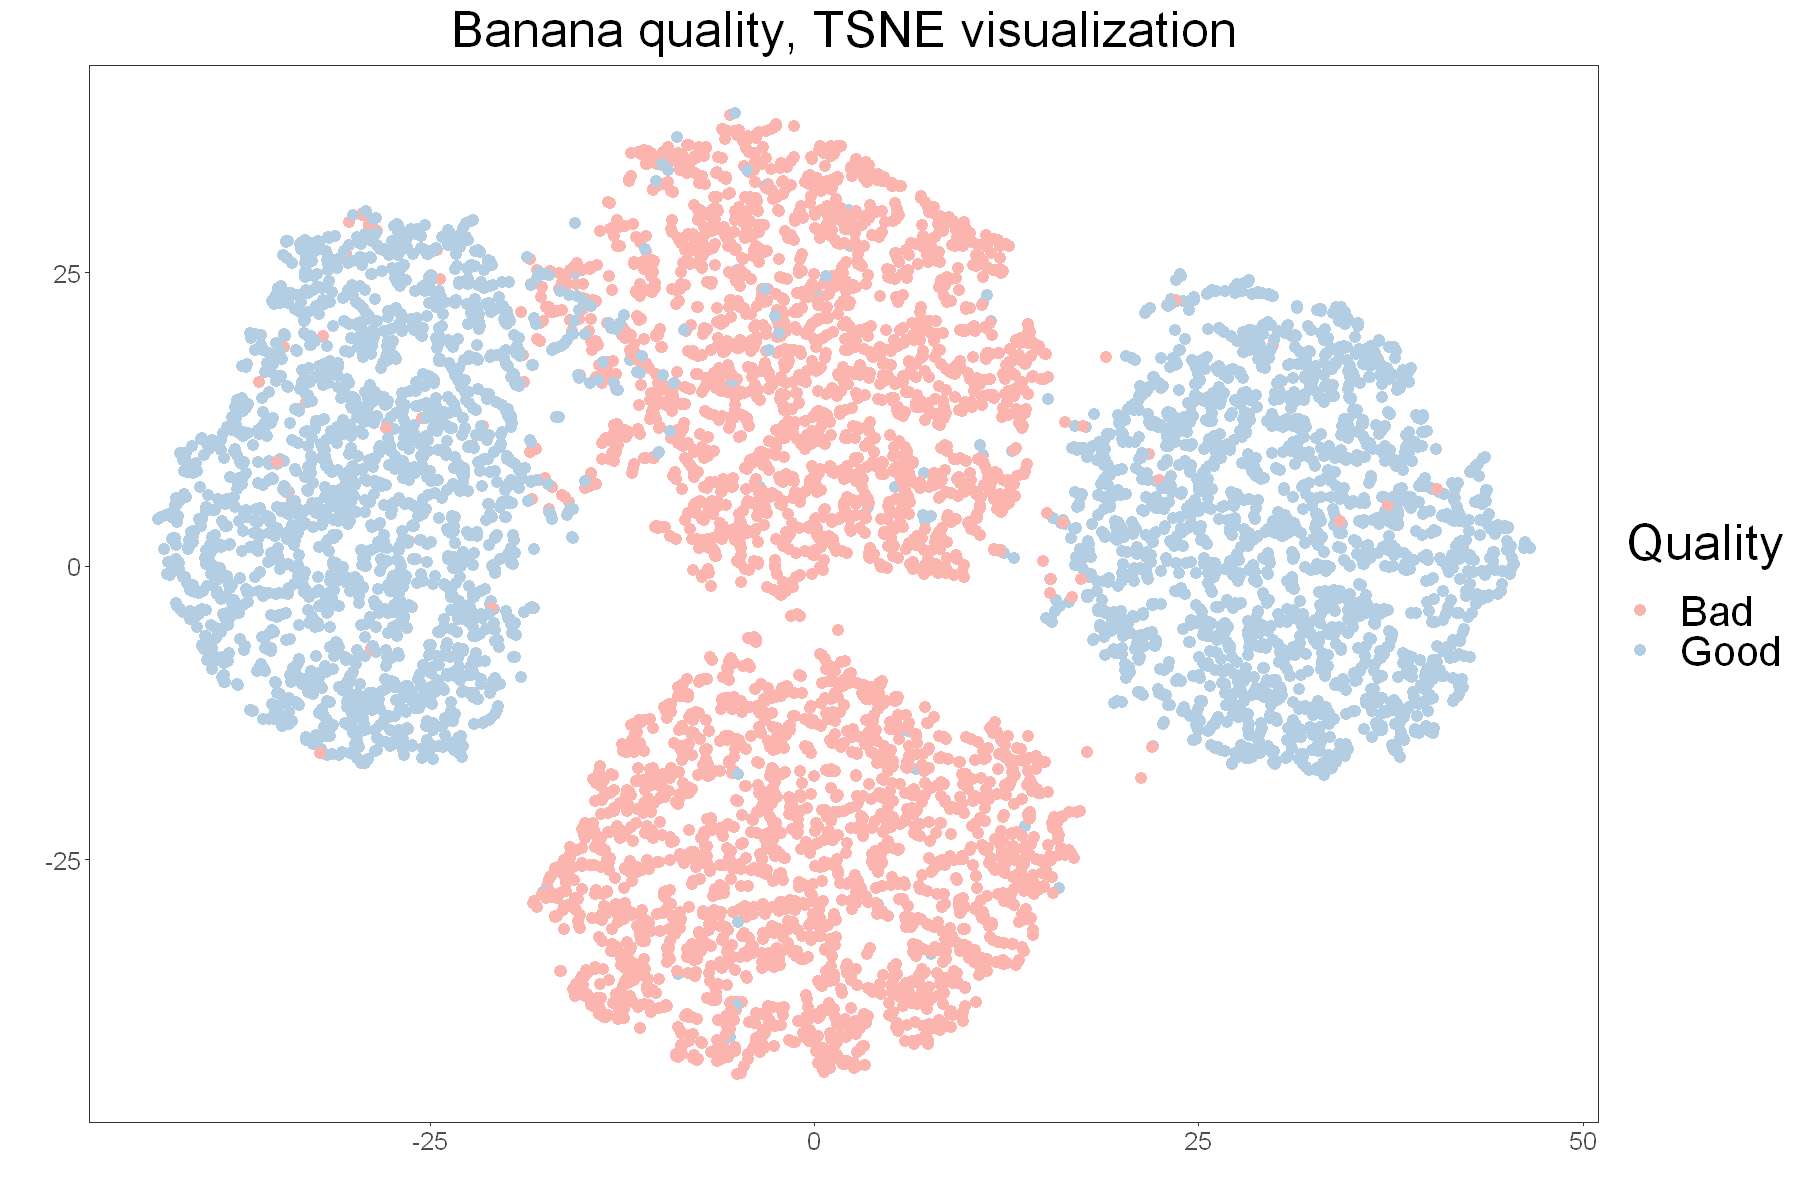

In [42]:
z <- as.data.frame(tsne_resultado$Y[,1:2])
colnames(z) <- c("z1","z2")
ggplot(data = z) + 
    geom_point(aes(x = z1, y = z2, color = as.factor(df_t[,8])),
              size = 3) + 
    scale_color_manual(values = c(colores_pastel[1],colores_pastel[2])) + 
    theme_bw() + 
      theme(plot.title = element_text(color = "black",
                                  size = 30,hjust=0.5),
        axis.title.x = element_text(size = 20),  
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15),
        #panel.border = element_blank(),  
        panel.spacing = unit(0, "lines"),
        legend.text = element_text(size = 25),
        legend.title = element_text(size = 30),
        #legend.position = "none",
        panel.grid.major = element_blank(),  
        panel.grid.minor = element_blank()) + 
        labs(title = "Banana quality, TSNE visualization", color = "Quality", x = "", y = "")


# Gaussian mixtures for classification

In [67]:
set.seed(1011)
sample_train <- sample(1:dim(df_t)[1], ceiling(dim(df_t)[1]*.80),
                       replace = FALSE)

df_train <- df_t[sample_train,]
df_test <- df_t[-sample_train,]

X_train <- df_train[,1:7]
y_train <- df_train$Quality
X_test <- df_test[,1:7]
y_test <- df_test$Quality
head(X_train)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3711,-2.669853,-1.7454903,-0.02084461,0.15101357,-3.2466133,1.189774,-0.9379025
4616,4.160499,1.1708424,-3.15602850,-0.05601379,-0.3782443,-2.302030,0.1693583
1581,-4.081679,0.7138600,2.89137960,-1.51792870,-2.4574630,1.336436,-1.1656158
7230,-4.058986,1.8677306,-0.52551420,3.30070100,1.0914818,-1.717686,1.6729175
7321,-2.769485,-1.5775411,0.23339476,2.85387330,-2.8789477,-2.015255,-0.3218897
6605,-5.209122,-0.9492244,-0.20733300,1.79525790,-2.9705536,0.890713,2.2440388


## Train the model

In [15]:
mod <-  MclustDA(X_train, y_train)

In [66]:
mod$models$Good$parameters[c("pro","mean")]#Proportion and means for the two mixtures in the good class

Size,-1.535335,1.535951
Weight,1.530274,-1.499752
Sweetness,1.457992,-1.502259
Softness,-1.509643,1.440125
HarvestTime,-1.475417,1.456292
Ripeness,1.537098,1.511346
Acidity,1.495014,-1.501830


In [65]:
mod$models$Bad$parameters[c("pro","mean")]#Proportion and means for the two mixtures in the bad class

Size,-1.540730,0.10806448,-1.514389
Weight,-1.543765,0.01729730,-1.547163
Sweetness,-1.490125,-0.77760374,-1.524800
Softness,1.493876,-0.28577592,-1.475316
HarvestTime,-1.504740,0.23454211,-1.499125
Ripeness,-1.487286,2.00806640,1.554155
Acidity,1.493626,-0.02545891,-1.499312


## Test model

### Train data

In [59]:
y_pred <-  predict.MclustDA(object = mod, X_train)$classification
tab <- table(y_train,y_pred)
tab

       y_pred
y_train  Bad Good
   Bad  3153   29
   Good   39 3179

In [60]:
sum(diag(tab))/length(y_train)#Accuracy

[1] 0.989375

In [61]:
prec <- diag(tab)/apply(tab,2,sum)
recall <- diag(tab)/apply(tab,1,sum)
f1_score <- 2 * (prec * recall)/(prec + recall)
metrics <- data.frame(prec,recall,f1_score)
round(metrics,4)

,prec,recall,f1_score
,<dbl>,<dbl>,<dbl>
Bad,0.9878,0.9909,0.9893
Good,0.9910,0.9879,0.9894


# Test data

In [62]:
y_pred <-  predict.MclustDA(object = mod, X_test)$classification
tab <- table(y_test,y_pred)
tab

      y_pred
y_test Bad Good
  Bad  805    7
  Good  10  778

In [63]:
sum(diag(tab))/length(y_test)#Accuracy

[1] 0.989375

In [64]:
prec <- diag(tab)/apply(tab,2,sum)
recall <- diag(tab)/apply(tab,1,sum)
f1_score <- 2 * (prec * recall)/(prec + recall)
metrics <- data.frame(prec,recall,f1_score)
round(metrics,4)

,prec,recall,f1_score
,<dbl>,<dbl>,<dbl>
Bad,0.9877,0.9914,0.9896
Good,0.9911,0.9873,0.9892
